# Exercises

In [42]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

import prepare
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**1. Spam Data**
    
a. Load the spam data set.

In [18]:
# acquire the raw data
df = pd.read_csv('spam.csv', 
                 encoding='latin-1',
                 usecols=[0,1]) # use first 2 columns only to get rid of unnamed columns full of nans
df.columns = ['label', 'text']

In [19]:
# prepare the data cleaned
df = prepare.prep_article_data(df, 'text')

In [20]:
# add a words column
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.lemmatized]

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [21]:
df.head()

,label,original,clean,stemmed,lemmatized,words
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]"


In [22]:
# make strings of all words in each category
ham_words = ' '.join(df[df.label=='ham'].lemmatized)
spam_words = ' '.join(df[df.label=='spam'].lemmatized)
all_words = ' '.join(df.lemmatized)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [25]:
# create a series to see how often each word occurs
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    499
ur      340
get     328
ltgt    241
go      232
dtype: int64

In [26]:
# create a df with all word counts combined
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [28]:
# add a document length column
df['doc_length'] = [len(wordlist) for wordlist in df.words]

In [36]:
df[df.doc_length==0]

,label,original,clean,stemmed,lemmatized,words,doc_length
959,ham,Where @,,,,[],0
2805,ham,Can a not?,,,,[],0
3374,ham,:),,,,[],0
4573,ham,:( but your not here....,,,,[],0
4822,ham,:-) :-),,,,[],0


In [37]:
# eliminate rows with no resulting text
df = df[df.doc_length!=0]

In [38]:
df.head()

,label,original,clean,stemmed,lemmatized,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6


 b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

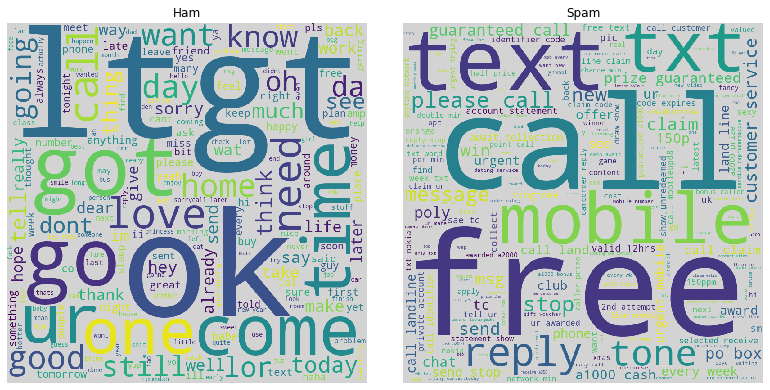

In [40]:
# word cloud for ham and spam words
ham_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [44]:
# add bigrams to the df
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]

In [52]:
# get the bigrams for ham and spam
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts()
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts()

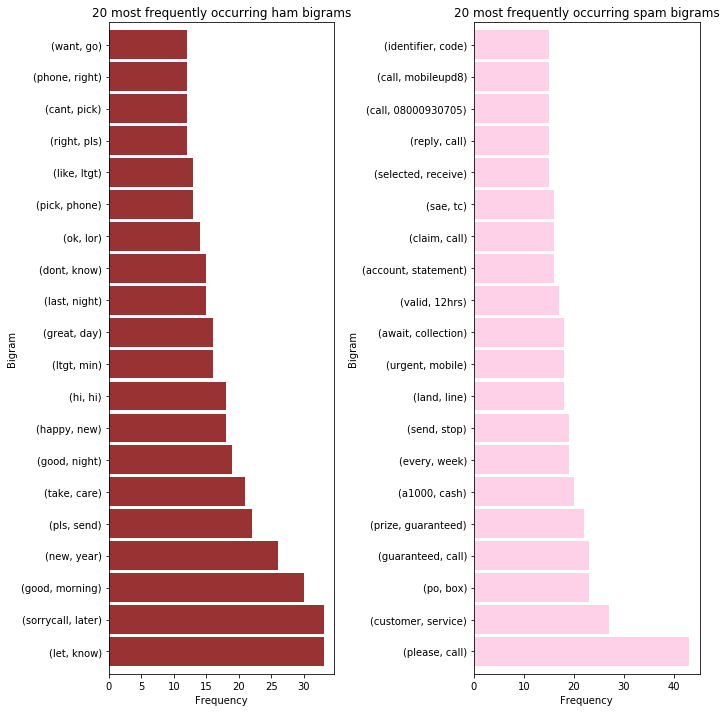

In [53]:
plt.subplot(121)
ham_bigrams.head(20).plot.barh(color='maroon', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.head(20).plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

 c. Is there any overlap in the bigrams for the spam data and the ham data?

In [66]:
ham_bigrams.index.isin(spam_bigrams.index).sum()

110

 d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [67]:
# add trigrams to the df
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]

In [69]:
# get the trigrams for ham and spam
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts()
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts()

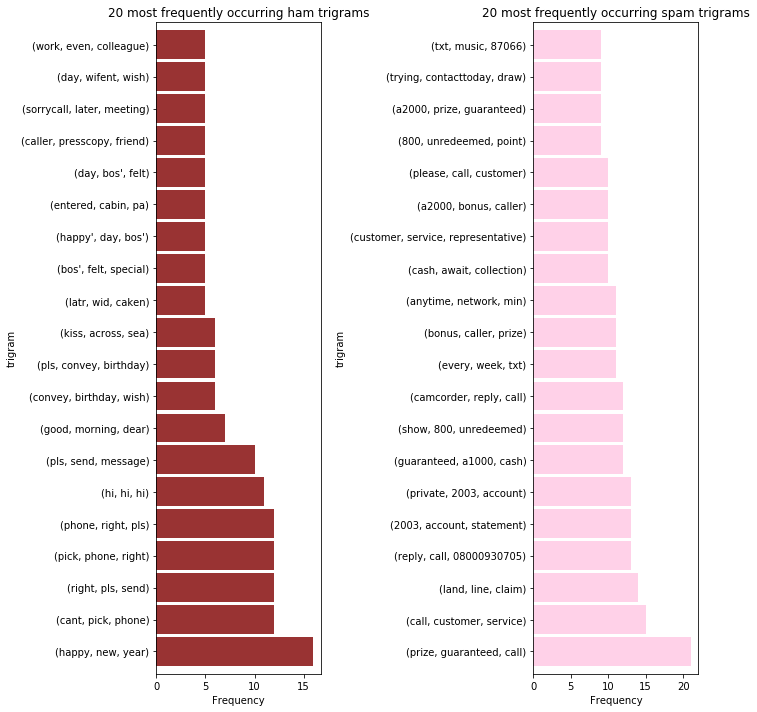

In [70]:
plt.subplot(121)
ham_trigrams.head(20).plot.barh(color='maroon', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.head(20).plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

**2. Explore the blog articles using the techniques discussed in the exploration lesson.**

In [75]:
# import functions
from acquire import get_all_urls, get_blog_articles, get_news_articles
from prepare import  prep_article_data

In [76]:
# acquire + prep data
codeup_df = prep_article_data(get_blog_articles(get_all_urls()), 'content')
news_df = prep_article_data(get_news_articles(), 'content')

**3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.**